# 1. Import Necessary Libraries

In [419]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [420]:
#converting into dataframe
df = pd.read_csv('cleveland.csv')

In [421]:
df.shape

(200, 14)

In [422]:
df.head()

age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0   63    1   4      140  260   0        1     112     1       3     2  ?   
1   44    1   4      130  209   0        1     127     0       0     ?  ?   
2   60    1   4      132  218   0        1     140     1     1.5     3  ?   
3   55    1   4      142  228   0        1     149     1     2.5     1  ?   
4   66    1   3      110  213   1        2      99     1     1.3     2  ?   

  thal  target  
0    ?       2  
1    ?       0  
2    ?       2  
3    ?       1  
4    ?       0

In [423]:
df['target']=df['target'].map({0: 0, 1:1,2:1,3:1,4:1})

In [424]:
df.head()

age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0   63    1   4      140  260   0        1     112     1       3     2  ?   
1   44    1   4      130  209   0        1     127     0       0     ?  ?   
2   60    1   4      132  218   0        1     140     1     1.5     3  ?   
3   55    1   4      142  228   0        1     149     1     2.5     1  ?   
4   66    1   3      110  213   1        2      99     1     1.3     2  ?   

  thal  target  
0    ?       1  
1    ?       0  
2    ?       1  
3    ?       1  
4    ?       0

In [425]:
df.describe()

age         sex          cp     restecg      target
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean    59.350000    0.970000    3.505000    0.735000    0.745000
std      7.811697    0.171015    0.795701    0.683455    0.436955
min     35.000000    0.000000    1.000000    0.000000    0.000000
25%     55.000000    1.000000    3.000000    0.000000    0.000000
50%     60.000000    1.000000    4.000000    1.000000    1.000000
75%     64.000000    1.000000    4.000000    1.000000    1.000000
max     77.000000    1.000000    4.000000    2.000000    1.000000

In [354]:
#Survey:
#https://www.ncbi.nlm.nih.gov/pubmed/9527093
#https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.62.2.240
#https://www.ajconline.org/article/S0002-9149(97)01011-4/pdf
#https://www.google.com/search?q=angiographic&oq=angiographic&aqs=chrome..69i57j69i59l2j0l3j69i61l2.1666j0j7&sourceid=chrome&ie=UTF-8

In [355]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [356]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [357]:
df['target'].value_counts()

1    149
0     51
Name: target, dtype: int64

# 3. Exploratory Data Analysis Data Visualization

1    149
0     51
Name: target, dtype: int64

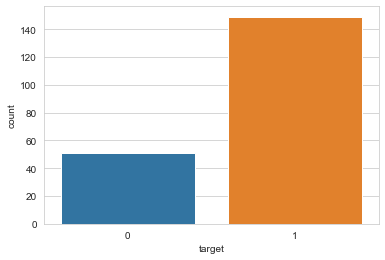

In [358]:
sns.countplot(df.target)
df.target.value_counts()

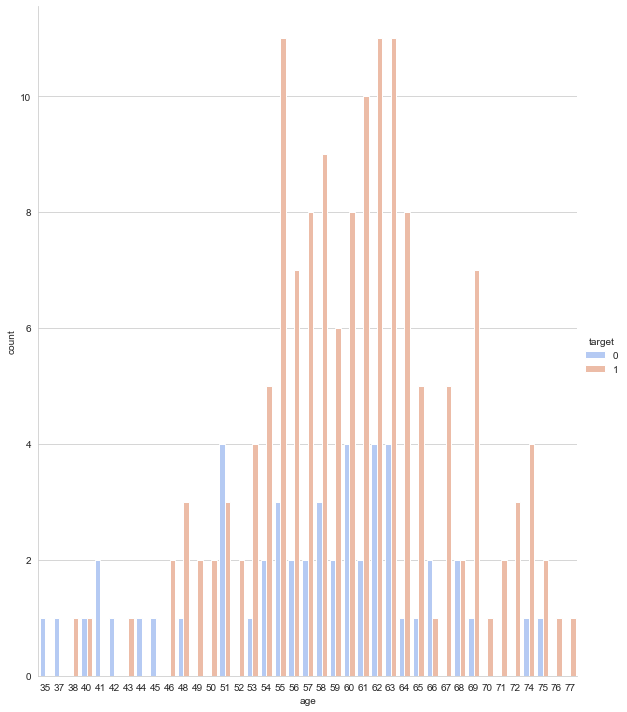

In [359]:
sns.factorplot('age', kind='count', hue='target', data=df, palette='coolwarm', height=10, aspect=.8)

Summary:<br>
1.The heart disease presence chances increase as the person become elder and elder.

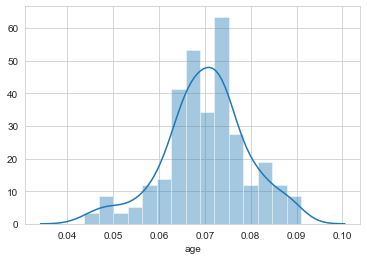

In [311]:
sns.distplot(df['age'])

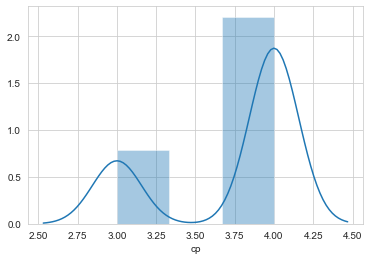

In [408]:
sns.distplot(df['cp'])

### Lets See the gender wise distribution of features

In [8]:
import plotly.express as px
fig = px.violin(df, x="sex", y="thalach",color="sex",points="all",box=True,hover_data=df.columns)
fig.show()

In [9]:
fig = px.violin(df, x="sex", y="chol",color="sex",points="all",box=True,hover_data=df.columns)
fig.show()

### Age wise distribution of features

In [10]:
fig = px.histogram(df, x="age", y="thalach")
fig.show()

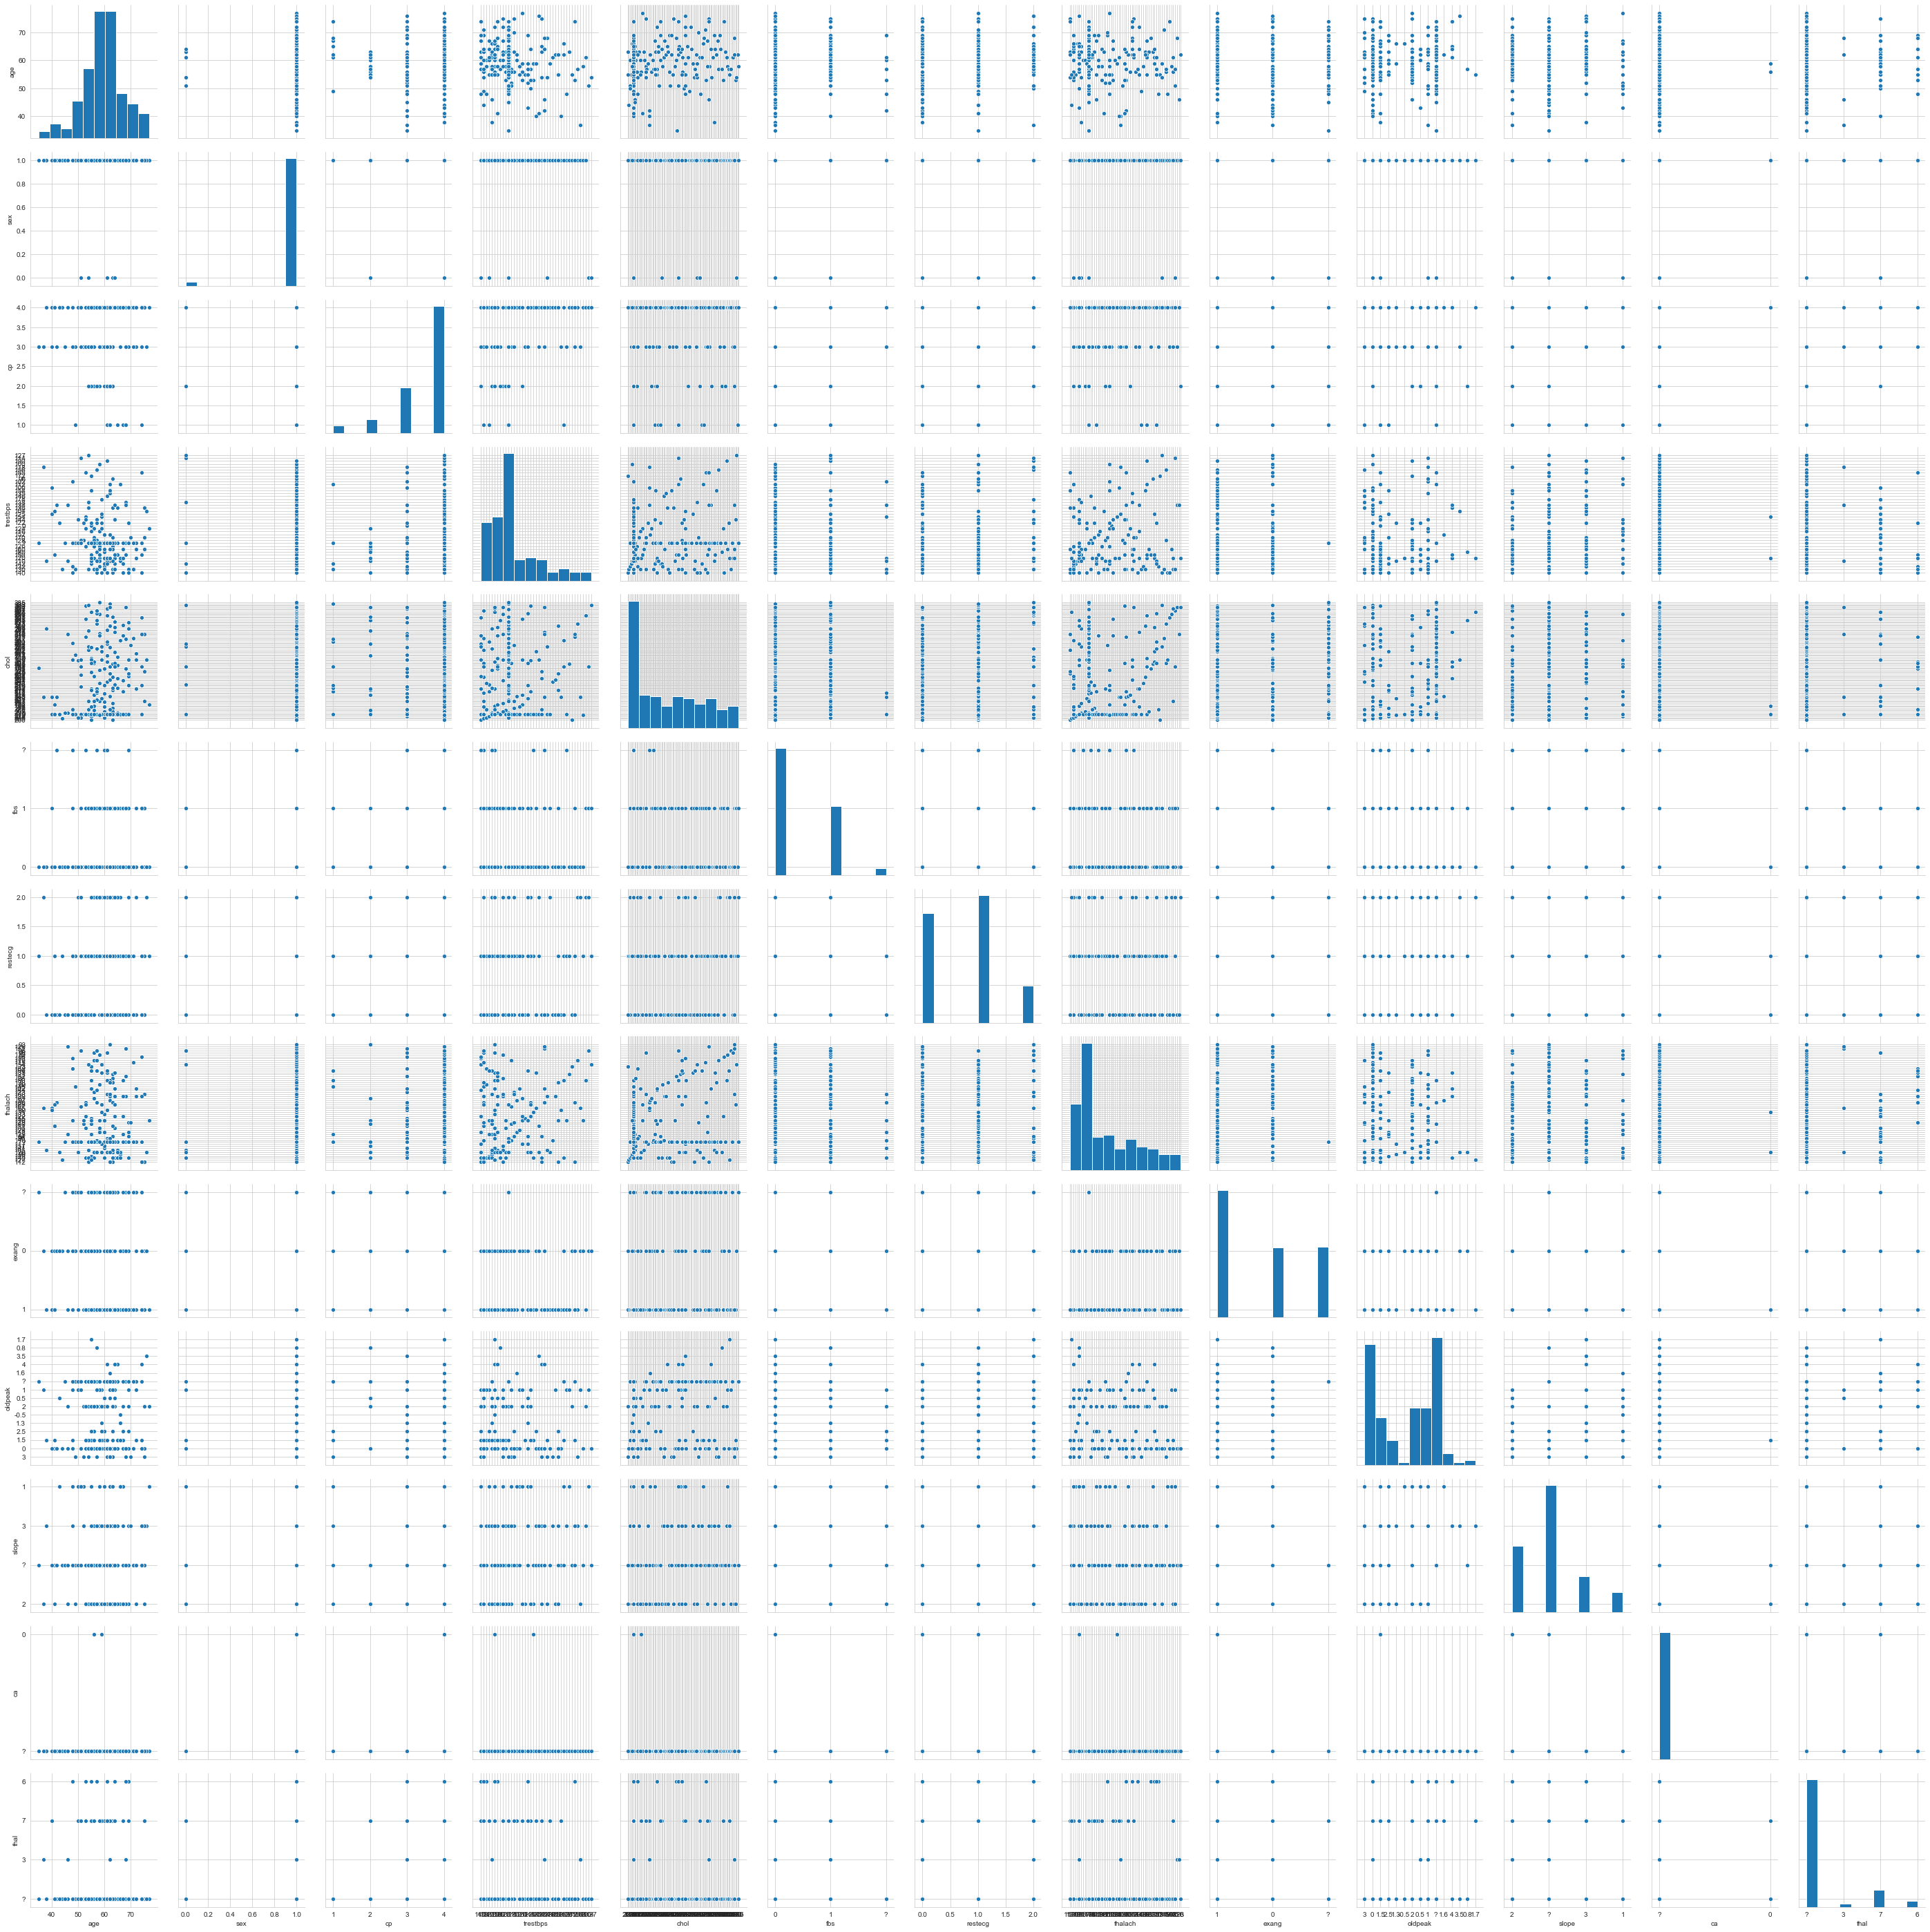

In [11]:
components=df.drop(['target'],axis=1).columns

sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df,vars=components ,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

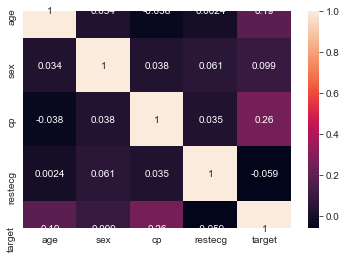

In [99]:
corr=df.corr()
sns.heatmap(corr, annot=True)

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [426]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#df_train['Name']= label_encoder.fit_transform(df_train['Name']) 
df['trestbps']= label_encoder.fit_transform(df['trestbps']) 
df['chol']= label_encoder.fit_transform(df['chol']) 
df['fbs']= label_encoder.fit_transform(df['fbs']) 
df['thalach']= label_encoder.fit_transform(df['thalach']) 
df['exang']= label_encoder.fit_transform(df['exang']) 
df['oldpeak']= label_encoder.fit_transform(df['oldpeak']) 
df['slope']= label_encoder.fit_transform(df['slope']) 
df['ca']= label_encoder.fit_transform(df['ca']) 
df['thal']= label_encoder.fit_transform(df['thal']) 

In [427]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()


normalizer.fit(df['age'].values.reshape(1,-1))
age_tranformed = normalizer.transform(df['age'].values.reshape(1,-1))

normalizer.fit(df['restecg'].values.reshape(1,-1))
restecg_tranformed = normalizer.transform(df['restecg'].values.reshape(1,-1))

normalizer.fit(df['sex'].values.reshape(1,-1))
sex_tranformed = normalizer.transform(df['sex'].values.reshape(1,-1))

normalizer.fit(df['cp'].values.reshape(1,-1))
cp_tranformed = normalizer.transform(df['cp'].values.reshape(1,-1))

normalizer.fit(df['trestbps'].values.reshape(1,-1))
trestbps_tranformed = normalizer.transform(df['trestbps'].values.reshape(1,-1))

normalizer.fit(df['chol'].values.reshape(1,-1))
chol_tranformed = normalizer.transform(df['chol'].values.reshape(1,-1))

normalizer.fit(df['fbs'].values.reshape(1,-1))
fbs_tranformed = normalizer.transform(df['fbs'].values.reshape(1,-1))

normalizer.fit(df['thalach'].values.reshape(1,-1))
thalach_tranformed = normalizer.transform(df['thalach'].values.reshape(1,-1))

normalizer.fit(df['exang'].values.reshape(1,-1))
exang_tranformed = normalizer.transform(df['exang'].values.reshape(1,-1))

normalizer.fit(df['oldpeak'].values.reshape(1,-1))
oldpeak_tranformed = normalizer.transform(df['oldpeak'].values.reshape(1,-1))

normalizer.fit(df['ca'].values.reshape(1,-1))
ca_tranformed = normalizer.transform(df['ca'].values.reshape(1,-1))

normalizer.fit(df['slope'].values.reshape(1,-1))
slope_tranformed = normalizer.transform(df['slope'].values.reshape(1,-1))

normalizer.fit(df['thal'].values.reshape(1,-1))
thal_tranformed = normalizer.transform(df['thal'].values.reshape(1,-1))


In [428]:
df['age']= age_tranformed.transpose()
df['sex']= sex_tranformed.transpose()
df['cp']= cp_tranformed.transpose()
df['restecg']= restecg_tranformed.transpose()
df['trestbps']= trestbps_tranformed.transpose()
df['chol']= chol_tranformed.transpose()
df['fbs']= fbs_tranformed.transpose()
df['thalach']= thalach_tranformed.transpose()
df['exang']= exang_tranformed.transpose()
df['oldpeak']= oldpeak_tranformed.transpose()
df['ca']= age_tranformed.transpose()
df['slope']= age_tranformed.transpose()
df['thal']= age_tranformed.transpose()


## C.Removing outliers using standard methods

In [429]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([ 51,  66,  72,  76,  79,  96,  96,  96,  96,  97, 126, 128, 131,
       133, 137, 190, 195, 196], dtype=int64), array([ 1,  2,  2,  2,  1,  0, 10, 11, 12,  2,  1,  1,  2,  2,  2,  1,  1,
        2], dtype=int64))


### E .Train_test Split

In [460]:
y=df['target']
x=df.drop(['target'],axis=1)


In [461]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [462]:
round(X_train, 2)

age   sex    cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
122  0.06  0.07  0.08      0.04  0.03  0.1     0.00     0.01   0.06     0.07   
83   0.07  0.07  0.08      0.05  0.12  0.0     0.00     0.04   0.06     0.03   
36   0.07  0.07  0.08      0.10  0.10  0.0     0.07     0.11   0.11     0.11   
140  0.09  0.07  0.08      0.08  0.12  0.1     0.00     0.01   0.06     0.07   
22   0.07  0.07  0.06      0.04  0.00  0.0     0.07     0.01   0.06     0.01   
..    ...   ...   ...       ...   ...  ...      ...      ...    ...      ...   
113  0.09  0.07  0.08      0.10  0.04  0.0     0.00     0.11   0.11     0.11   
14   0.07  0.07  0.08      0.04  0.00  0.1     0.07     0.06   0.06     0.03   
99   0.07  0.07  0.06      0.04  0.00  0.1     0.07     0.08   0.00     0.08   
192  0.06  0.07  0.08      0.06  0.12  0.1     0.07     0.04   0.06     0.05   
109  0.05  0.07  0.06      0.10  0.07  0.0     0.00     0.11   0.11     0.11   

     slope    ca  thal  
122   0.06  0.06  0.06  
83    0.07  0.07  0.07  
36    0.07  0.07  0.07  
140   0.09  0.09  0.09  
22    0.07  0.07  0.07  
..     ...   ...   ...  
113   0.09  0.09  0.09  
14    0.07  0.07  0.07  
99    0.07  0.07  0.07  
192   0.06  0.06  0.06  
109   0.05  0.05  0.05  

[123 rows x 13 columns]

# 5. Building Models

# Model1 : KNN

In [463]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,70,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 70, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [456]:
clf.best_params_

{'n_neighbors': 11}

In [450]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7474358974358973, 0.8205128205128205, 0.7724358974358975, 0.7557692307692307, 0.7557692307692307, 0.7557692307692307, 0.7557692307692307, 0.7557692307692307, 0.7557692307692307, 0.7557692307692307]


Text(0, 0.5, 'Cross-Validated Accuracy')

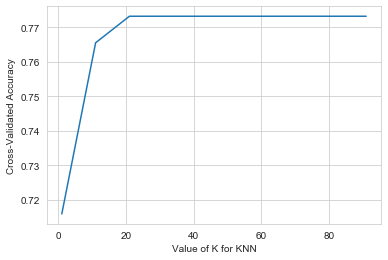

In [436]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

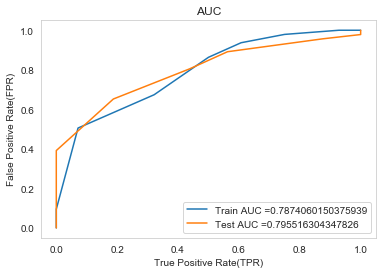

In [464]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [438]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.76      0.96      0.85        46

    accuracy                           0.74        62
   macro avg       0.63      0.54      0.52        62
weighted avg       0.69      0.74      0.68        62

0.7419354838709677


## Confusion Matrix

In [63]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [64]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 9  7]
 [ 9 37]]


In [65]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

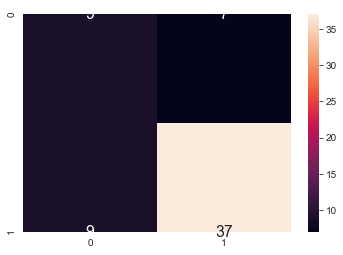

In [66]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [465]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,100,10)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [466]:
clf.best_params_

{'alpha': 1}

In [69]:
from sklearn.model_selection import cross_val_score
alpha = range(1,100,10)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484]


Text(0, 0.5, 'Cross-Validated Accuracy')

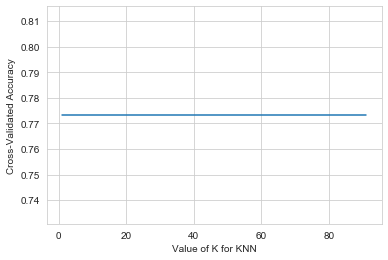

In [70]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

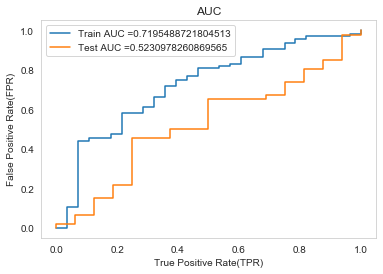

In [467]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [72]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.74      1.00      0.85        46

    accuracy                           0.74        62
   macro avg       0.37      0.50      0.43        62
weighted avg       0.55      0.74      0.63        62

0.7419354838709677


## Confusion Matrix

In [73]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [74]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[12  4]
 [27 19]]


In [75]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

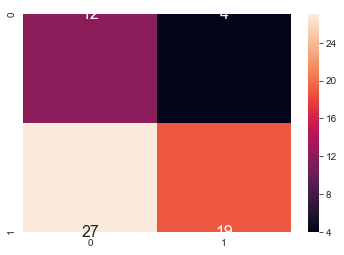

In [76]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8161654135338345


In [78]:
model.best_params_

{'C': 10000}

In [79]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7578671328671329, 0.7327505827505829]


In [80]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

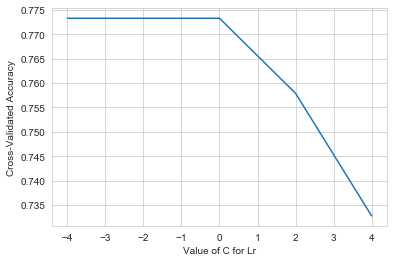

In [81]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

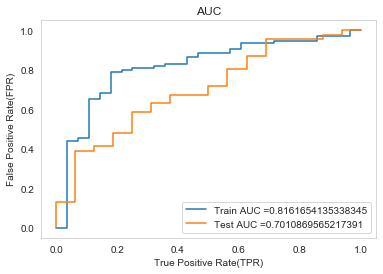

In [83]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=10000)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [84]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.79      0.89      0.84        46

    accuracy                           0.74        62
   macro avg       0.64      0.60      0.61        62
weighted avg       0.71      0.74      0.72        62

0.7419354838709677


## Confusion Matrix

In [85]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [86]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 9  7]
 [15 31]]


In [87]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

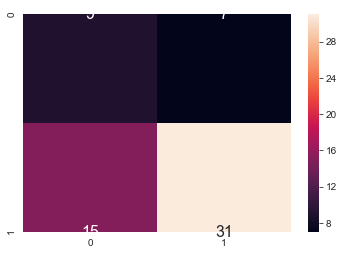

In [88]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [89]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [90]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.7973684210526316


In [91]:
model.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [92]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484, 0.7732517482517484]


In [93]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

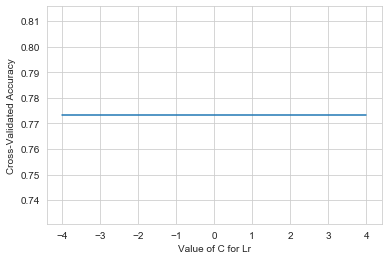

In [94]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

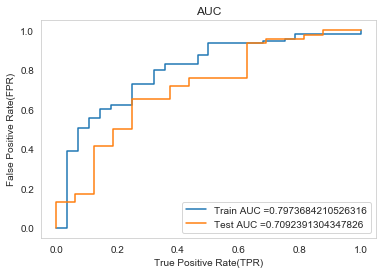

In [95]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=0.01,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [96]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.74      1.00      0.85        46

    accuracy                           0.74        62
   macro avg       0.37      0.50      0.43        62
weighted avg       0.55      0.74      0.63        62

0.7419354838709677


## Confusion Matrix

In [97]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [98]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[11  5]
 [16 30]]


In [99]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

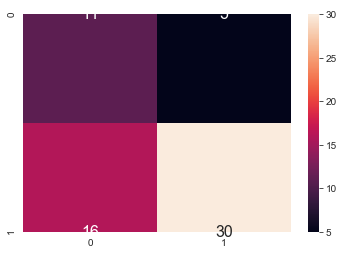

In [100]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [102]:
model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [103]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7900349650349651, 0.780944055944056, 0.780944055944056, 0.780944055944056]


Text(0, 0.5, 'Cross-Validated Accuracy')

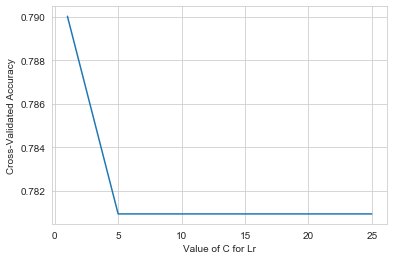

In [104]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

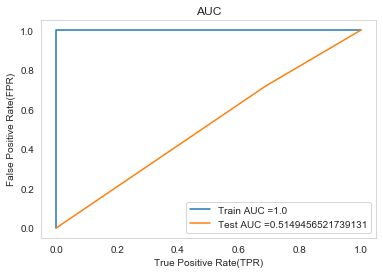

In [105]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

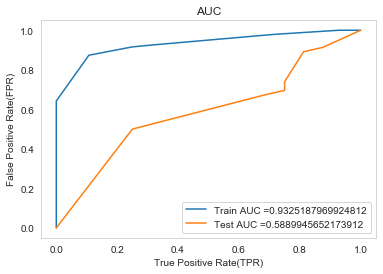

In [468]:
DT = DecisionTreeClassifier(max_depth=5,min_samples_split=10)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [107]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.31      0.28        16
           1       0.74      0.67      0.70        46

    accuracy                           0.58        62
   macro avg       0.49      0.49      0.49        62
weighted avg       0.61      0.58      0.59        62

0.5806451612903226


## Confusion Matrix

In [108]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [109]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 5 11]
 [15 31]]


In [110]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

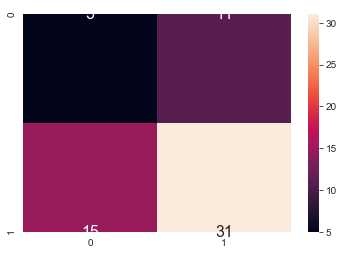

In [111]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

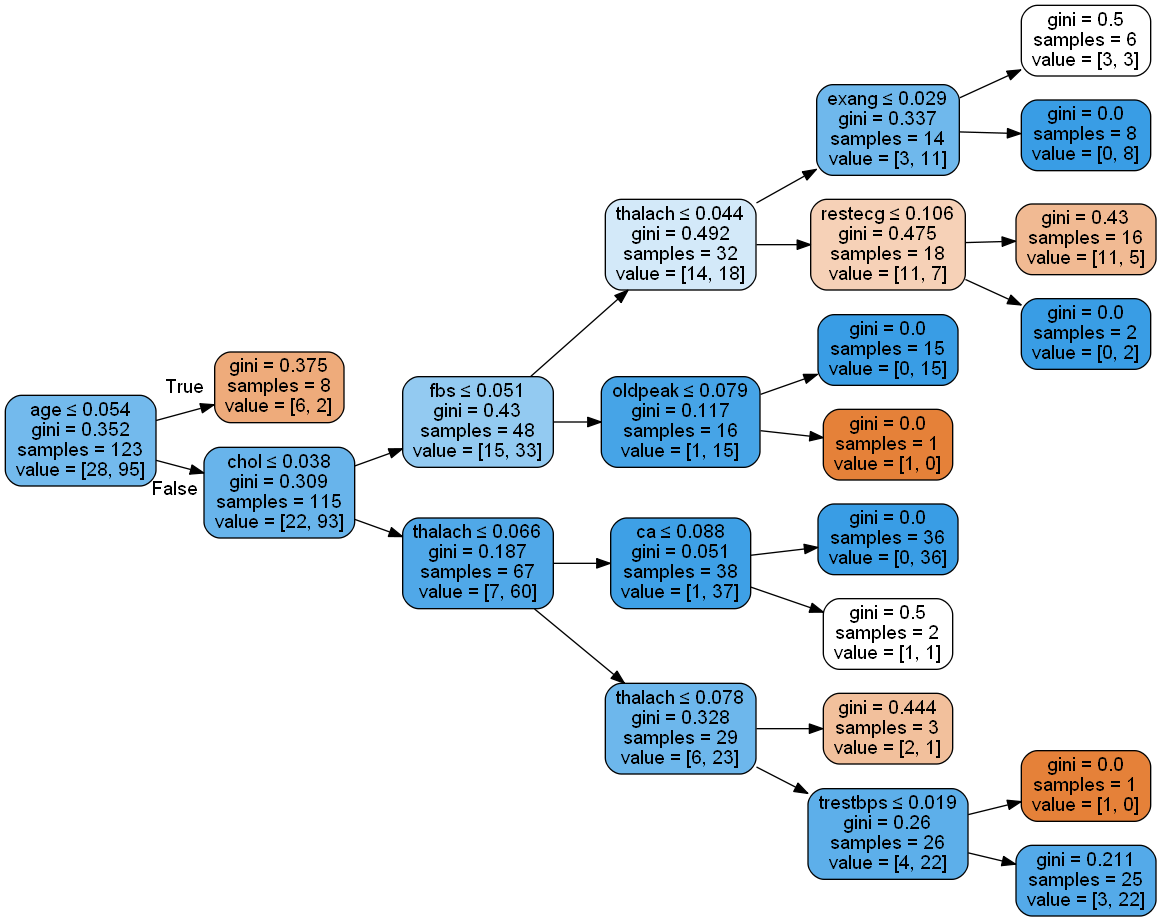

In [112]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [113]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9981203007518796


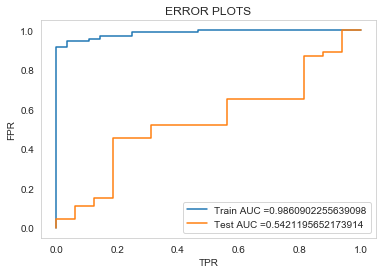

In [118]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=5,n_estimators=10,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [139]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       173
           1       0.74      0.83      0.78        98

    accuracy                           0.83       271
   macro avg       0.82      0.83      0.82       271
weighted avg       0.84      0.83      0.84       271

0.8339483394833949


## Confusion Matrix

In [140]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

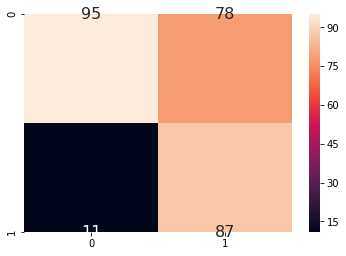

In [141]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [119]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.5427989130434783


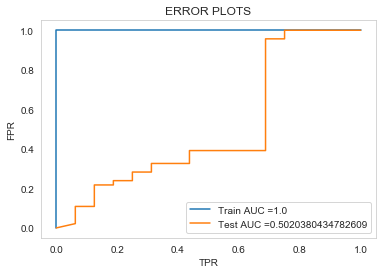

In [120]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=50)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [121]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        16
           1       0.77      0.80      0.79        46

    accuracy                           0.68        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.66      0.68      0.67        62

0.6774193548387096


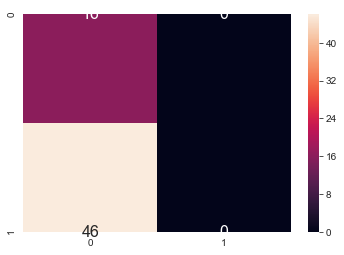

In [122]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [123]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [124]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.691
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.672
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.599
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.570
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.584
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.603


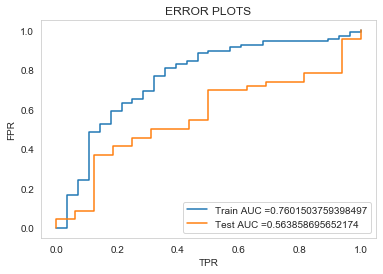

In [472]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

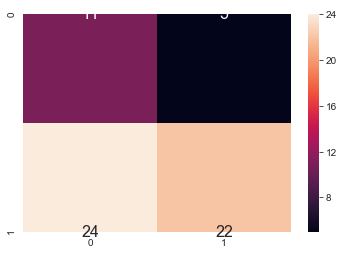

In [126]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[22:47:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


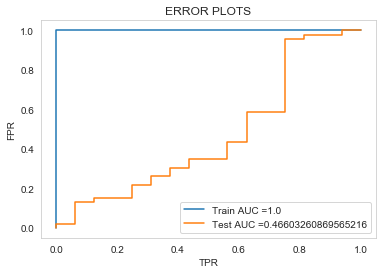

In [127]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [473]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '74.19','79.56' ])
table.add_row(['2',"Naive Bayes",'74.19' ,'52.30' ])
table.add_row(['3',"Logistic Regression", '74.19','70.17' ])
table.add_row(['4',"SVM", '74.19','70.93' ])
table.add_row(['5',"Decision Tree",'58.06' ,'58.89' ])
table.add_row(['6',"RandomForest",'83.55' ,'54.21' ])
table.add_row(['7',"GBDT",'67.74' ,'50.71' ])
table.add_row(['8',"Xgboost",'--' ,'46.53' ])
table.add_row(['9',"Stacking", '--','56.60' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  74.19   | 79.56 |
|   2   |     Naive Bayes     |  74.19   | 52.30 |
|   3   | Logistic Regression |  74.19   | 70.17 |
|   4   |         SVM         |  74.19   | 70.93 |
|   5   |    Decision Tree    |  58.06   | 58.89 |
|   6   |     RandomForest    |  83.55   | 54.21 |
|   7   |         GBDT        |  67.74   | 50.71 |
|   8   |       Xgboost       |    --    | 46.53 |
|   9   |       Stacking      |    --    | 56.60 |
+-------+---------------------+----------+-------+


Summary:<br>
1.KNN is the best model amongst all with AUC of 79.56<br>
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking , GBDT doesn't perform very well due to very amount of data<br>
4.But problems like heart diesease detection is problem of life or death hence we should be very sure before prediction hence rather thant this traditional model we have to construct a Cascading classifier which should pass through 3,4 layer of validation before predicting anything.

# 7.Creating Submission File

In [474]:
best_model=knn
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']